In [1]:
import tensorflow as tf

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import (Adam,
                              SGD)

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

import pandas as pd

In [11]:
exact_data = pd.read_excel("../UNT-Thermography-24/fused_silica_data/fused_silica_exact_train.xlsx")

exact_df = pd.DataFrame(exact_data)

X = exact_df[exact_df.columns[11:]]

Y = exact_df[exact_df.columns[0:11]]

print(f"The original data set has {exact_df.shape[0]} rows, and {exact_df.shape[1]} columns. "
      f"We want to predict {Y.shape[1]} output variables from {X.shape[1]} features")

exact_df.head()

The original data set has 10000 rows, and 77 columns. We want to predict 11 output variables from 66 features


,layer 1,layer 2,layer 3,layer 4,layer 5,layer 6,layer 7,layer 8,layer 9,layer 10,...,0.000008,0.000008,0.000008,0.000008,0.000008,0.000008,0.000008,0.000008,0.000008,0.000008
0,312.355087,301.649641,321.270850,324.903956,329.245296,337.694194,333.776774,333.750946,331.605971,333.828275,...,2.378753e-12,2.416740e-12,2.452565e-12,2.482976e-12,2.505710e-12,2.514345e-12,2.497372e-12,2.443515e-12,2.360022e-12,2.283099e-12
1,308.045992,314.390077,319.612686,324.021871,328.286597,324.268581,318.045216,310.205743,316.395558,315.206667,...,4.690686e-12,4.758857e-12,4.814785e-12,4.855500e-12,4.879557e-12,4.876002e-12,4.823191e-12,4.700047e-12,4.521287e-12,4.356649e-12
2,275.470643,334.023614,330.292063,333.180051,317.824092,306.451798,309.091647,312.060959,320.208051,336.027107,...,2.891349e-12,2.935824e-12,2.976514e-12,3.009965e-12,3.033863e-12,3.040662e-12,3.016554e-12,2.948046e-12,2.844024e-12,2.748188e-12
3,319.154096,314.324236,322.541381,324.154848,333.263850,344.199198,338.490892,334.185374,327.065180,303.761845,...,1.335647e-12,1.361978e-12,1.387258e-12,1.409588e-12,1.427626e-12,1.437648e-12,1.432962e-12,1.406923e-12,1.363502e-12,1.323517e-12
4,368.613557,330.588867,323.002818,322.824169,336.505619,328.080745,325.609686,335.941694,328.415271,330.880143,...,2.861867e-12,2.906931e-12,2.947792e-12,2.981218e-12,3.005087e-12,3.012002e-12,2.988298e-12,2.920602e-12,2.817710e-12,2.722916e-12


In [12]:
#Normalize features
scaler = sklearn.preprocessing.StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

In [13]:
#Goal: Using keras to implement a feed-forward neural network to predict temperatures of each layer given wavelength spectrum
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled_df, Y, train_size = .8, random_state = 1337)

X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, train_size=0.8, random_state = 1337)

print(
    f"Using {len(Y_train)} samples for training, "
    f"and {len(Y_test)} for testing "
    f"from {len(X_test) + len(X_train)} total samples."
)

Using 6400 samples for training, and 2000 for testing from 8400 total samples.


Epoch 1/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 931us/step - loss: 31249.4199 - mae: 139.9213 - val_loss: 185.0684 - val_mae: 10.0268
Epoch 2/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 725us/step - loss: 179.6241 - mae: 9.8079 - val_loss: 210.9301 - val_mae: 10.9443
Epoch 3/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 739us/step - loss: 199.9974 - mae: 10.5114 - val_loss: 174.9235 - val_mae: 9.6326
Epoch 4/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 695us/step - loss: 303.2933 - mae: 12.7082 - val_loss: 207.9056 - val_mae: 10.7795
Epoch 5/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 716us/step - loss: 178.3804 - mae: 9.7764 - val_loss: 147.7928 - val_mae: 8.5612
Epoch 6/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 690us/step - loss: 164.1181 - mae: 9.2459 - val_loss: 149.6993 - val_mae: 8.6745
Epoch 7/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 713us/step - loss: 189.7768 - mae: 10.1524 - val_loss: 156.6319 - val_mae: 8.6712
Epoch 8/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 691us/step - loss: 274.5594 - mae: 12.1146 - val_loss: 146.6131 - val_mae: 8.48

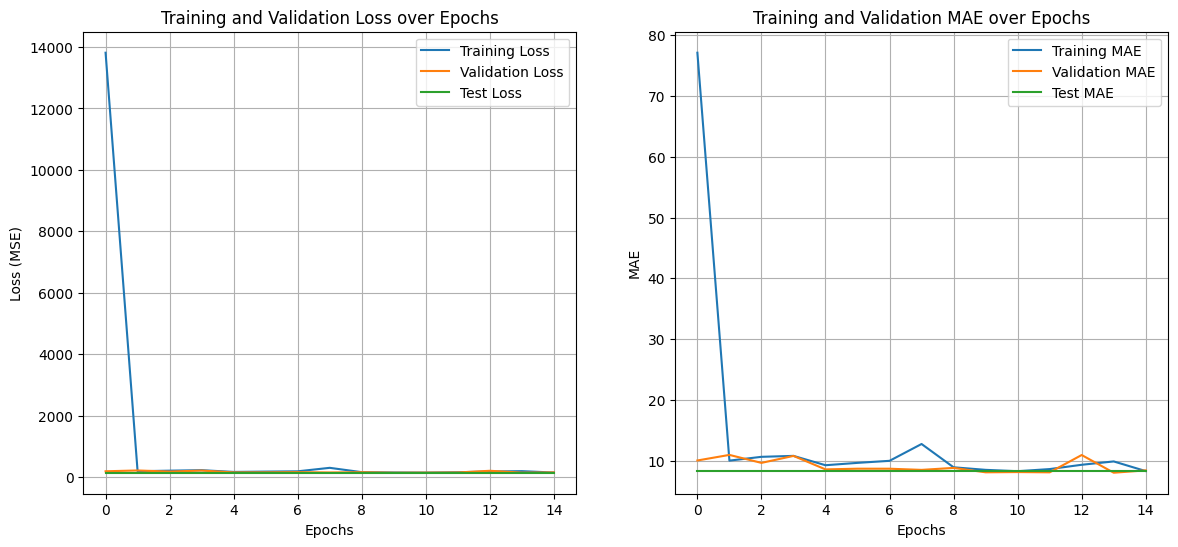

In [17]:
# Define the input shape
input_layer = keras.Input(shape=(X_train.shape[1],))

#Define the model (add more layers? increase nodes?)
exact_model = keras.Sequential([input_layer, #input_layer --> informs input shape
    Dense(256, activation="relu"), # first hidden layer
    Dense(128, activation="relu"), # second hidden layer
    # layers.Dense(20, activation="relu"), # third hidden layer
    # layers.Dense(20, activation="relu"), # fourth hidden layer
    Dense(11)  # Output layer with 11 neurons for each temperature target
])

# Compile the model
# Instantiate optimizer with adjustable learning rate
# observed: sweet spot .02 > x > .001
Adam1 = Adam(learning_rate = 0.009)
sgd = SGD(learning_rate = 0.009)

# Leverage both MSE and MAE (experimental)
# test different optimizers: SGD (*stochastic gradient descent: better for large data sets)
exact_model.compile(loss="mse", optimizer=Adam1, metrics=["mae"])  # Loss: MSE, Optimizer: Adam w/ MAE

# Train the model
# Thoughts: Overfit then implement regularization
# play around with batch size: batch size for larger datasets more likely to improve its performance
# Dima went up to 60 epochs for GaN_exact: later 600 -> imrpovement plateaus around 120 epochs
# plot loss over epochs
history = exact_model.fit(X_train, Y_train, epochs=15, validation_data = [X_val, Y_val])

#View Training Error
print(f"train_MSE: {history.history["loss"]}")
print(f"train_MAE: {history.history.get("mae", None)}")

# Evaluate the model on the validation set (separate call)
validation_loss, validation_accuracy = exact_model.evaluate(X_val, Y_val)

print(f"val_MSE: {validation_loss}, val_MAE: {validation_accuracy}")

test_loss, test_mae = exact_model.evaluate(X_test, Y_test)

print(f"test_MSE: {test_loss}, test_MAE: {test_mae}")

history.history['test_loss'] = [test_loss] * len(history.history['loss'])
history.history['test_mae'] = [test_mae] * len(history.history['mae'])

# Plot training & validation loss and mae values
plt.figure(figsize=(14, 6))

# Plot training and validation loss
plt.subplot(1, 2, 1)
plt.plot(history.history["loss"], label='Training Loss')
plt.plot(history.history["val_loss"], label='Validation Loss')
plt.plot(history.history["test_loss"], label='Test Loss')
plt.title('Training and Validation Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)

# Plot training and validation MAE
plt.subplot(1, 2, 2)
plt.plot(history.history["mae"], label="Training MAE")
plt.plot(history.history["val_mae"], label="Validation MAE")
plt.plot(history.history["test_mae"], label="Test MAE")
plt.title('Training and Validation MAE over Epochs')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.grid(True)

plt.show()




In [15]:
# Evaluate the model on unseen data
loss, mae = exact_model.evaluate(X_test, Y_test)
print("test_MSE:", loss)
print("test_MAE:", mae)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 340us/step - loss: 149.3885 - mae: 8.7318
test_MSE: 148.90750122070312
test_MAE: 8.779891967773438


# TODO:
* plot predictions against actual (scatter plot to see if similar)

* m nodes by n layers: want m*n to be less than number of data points
* per layer residual
* avg (above) to get overall residual
* plot error over epochs
* increase layers: implement loop
* change activation function to hyperbolic tangent: (theoretical difference: ReLu 0 and 1, tangent maintains 
* positive and negative (if normalized data is positive and negative, it is possible tanegent would work 
* better (consider what might happen if all data is positive)))
* 20 layers 250 nodes, batch size 15, epochs 220
* learning rate vs momenta/momento?? may reduce epochs

# Reading in MATLAB data

In [8]:
import scipy.io
mat = scipy.io.loadmat('../UNT-Thermography-24/fused_silica_data/data_GaN_8_15micron_1.mat')
Temp_all = mat.get('T_GaN_random')
Spectra_all = mat.get('Spectrum')

In [49]:
Spectra_all.shape

(10000, 71)

In [47]:
Temp_all.shape

(10000, 10)

In [55]:
# Temp_all = mat.get('T_GaN_random')
# temp_2d = Temp_all.reshape(10000, 10)
# temp_2d

# Spectra_all = mat.get('Spectrum')
# spectra_2d = Spectra_all.reshape(10000, 71)
# spectra_2d

array([[354.47236864, 327.07393371, 372.70032716, ..., 365.58379889,
        365.68595734, 300.45984349],
       [291.33367062, 347.78170911, 277.75341942, ..., 303.99897837,
        322.21712593, 347.18597075],
       [356.00771737, 349.67975325, 342.13936962, ..., 331.32114696,
        357.47165997, 287.90707088],
       ...,
       [280.3720307 , 280.07243342, 280.70569281, ..., 280.37762327,
        280.44602254, 280.57300082],
       [280.85295468, 280.33695585, 280.44436814, ..., 280.28859155,
        280.62967699, 280.71671492],
       [280.83054536, 280.61342534, 280.60436592, ..., 280.66774841,
        280.34940325, 280.70790655]])

In [60]:
Temp_all = mat.get('T_GaN_random')
temp_2d = Temp_all.reshape(10000, 10)
temp_2d.shape

Spectra_all = mat.get('Spectrum')
spectra_2d = Spectra_all.reshape(10000, 71)
spectra_2d.shape

pd_spectra = pd.DataFrame(spectra_2d)
pd_temp = pd.DataFrame(temp_2d)

X = pd_spectra.iloc[0:10000]
Y = pd_temp.iloc[0:10000]


# Neural Network with MATLAB Data

Epoch 1/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 73190.5234 - mae: 255.2032 - val_loss: 21541.3398 - val_mae: 121.6179
Epoch 2/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 526us/step - loss: 20454.0332 - mae: 118.8229 - val_loss: 14914.9092 - val_mae: 101.2007
Epoch 3/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 531us/step - loss: 9444.9678 - mae: 75.8925 - val_loss: 236.2868 - val_mae: 11.2593
Epoch 4/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 546us/step - loss: 237.2030 - mae: 11.9091 - val_loss: 198.3447 - val_mae: 10.6675
Epoch 5/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 517us/step - loss: 209.4554 - mae: 11.2909 - val_loss: 210.4088 - val_mae: 10.9507
Epoch 6/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 531us/step - loss: 206.2193 - mae: 11.1001 - val_loss: 193.5046 - val_mae: 10.4192
Epoch 7/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 540us/step - loss: 214.0401 - mae: 11.3821 - val_loss: 198.0215 - val_mae: 10.9876
Epoch 8/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 526us/step - loss: 197.3566 - mae: 10.8975 - val_loss: 200.5480 

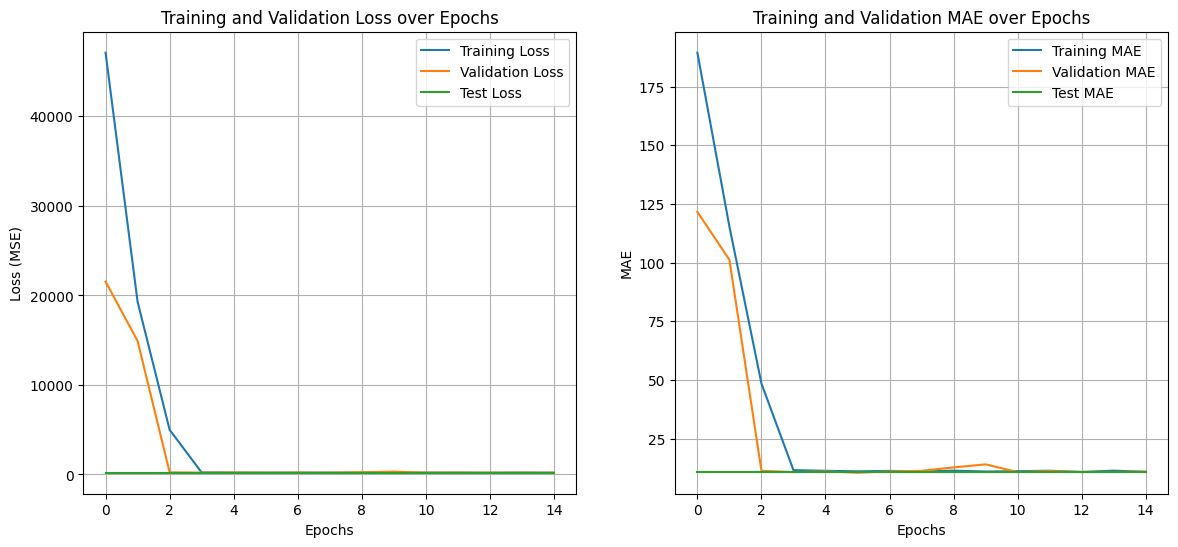

In [64]:
import scipy.io
import numpy as np
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load MATLAB file
mat = scipy.io.loadmat('../UNT-Thermography-24/fused_silica_data/data_GaN_8_15micron_1.mat')
Temp_all = mat.get('T_GaN_random')
temp_2d = Temp_all.reshape(10000, 10)
temp_2d.shape

Spectra_all = mat.get('Spectrum')
spectra_2d = Spectra_all.reshape(10000, 71)
spectra_2d.shape

pd_spectra = pd.DataFrame(spectra_2d)
pd_temp = pd.DataFrame(temp_2d)

X = pd_spectra.iloc[0:10000]
Y = pd_temp.iloc[0:10000]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled_df = pd.DataFrame(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, Y, test_size=0.2, random_state=1337)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1337)


# Define the model
input_layer = keras.Input(shape=(X_train.shape[1],))

model = keras.Sequential([input_layer,
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(10)
])


# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

history = model.fit(X_train, y_train, epochs=15, batch_size=32, validation_data = [X_val, y_val])

print(f"train_MSE: {history.history["loss"]}")
print(f"train_MAE: {history.history.get("mae", None)}")

# Evaluate the model on the validation set (separate call)
validation_loss, validation_accuracy = model.evaluate(X_val, y_val)

print(f"val_MSE: {validation_loss}, val_MAE: {validation_accuracy}")

test_loss, test_mae = model.evaluate(X_test, y_test)

print(f"test_MSE: {test_loss}, test_MAE: {test_mae}")

history.history['test_loss'] = [test_loss] * len(history.history['loss'])
history.history['test_mae'] = [test_mae] * len(history.history['mae'])

# Plot training & validation loss and mae values
plt.figure(figsize=(14, 6))

# Plot training and validation loss
plt.subplot(1, 2, 1)
plt.plot(history.history["loss"], label='Training Loss')
plt.plot(history.history["val_loss"], label='Validation Loss')
plt.plot(history.history["test_loss"], label='Test Loss')
plt.title('Training and Validation Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)

# Plot training and validation MAE
plt.subplot(1, 2, 2)
plt.plot(history.history["mae"], label="Training MAE")
plt.plot(history.history["val_mae"], label="Validation MAE")
plt.plot(history.history["test_mae"], label="Test MAE")
plt.title('Training and Validation MAE over Epochs')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.grid(True)

plt.show()